In [10]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

In [11]:
def function_2_original(x): # 단순한 버젼
    #print('x[0].shape={}'.format(x[0].shape))
    return x[0]**2 + x[1]**2

In [12]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

<img src = '../images/axis_explanation.png' width = 400px />

### 일단 함수 그려보기

In [14]:
x0 = np.arange(-2, 2, 0.25)
x1 = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(x0, x1)
print(X.shape, Y.shape)

nrows = X.shape[0]
ncols = X.shape[1]

(16, 16) (16, 16)


In [15]:
Xf = X.flatten()
Yf = Y.flatten()
arr = np.array([Xf, Yf])
arr = arr.transpose()
print(Xf.shape, Yf.shape)
print(arr.shape, arr.ndim)

(256,) (256,)
(256, 2) 2


In [16]:
Z = function_2(arr)
print(Z.shape)

(256,)


그림을 그리기 위한 reshape 1차원 $\rightarrow\$ 2차원 

In [17]:
Z = np.reshape(Z, (nrows,ncols))
print(X.shape, Y.shape, Z.shape)

(16, 16) (16, 16) (16, 16)


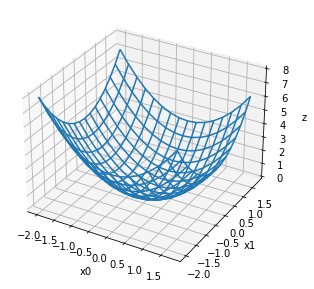

In [18]:
fig = plt.figure(figsize = (10,5))
ax = plt.axes( projection="3d")
ax.plot_wireframe(X, Y, Z)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('z')
plt.show()

### 3차원 곡면의 한 점에서의 기울기 구해보기

$\lim_{h\to0} {\frac {f(x+h) - f(x-h)}{2h}}$

In [19]:
def numerical_diff_1d(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [20]:
def numerical_gradient_single_point(f, x, verbose=False): 
    h = 1e-4
    grad = np.zeros_like(x)
    if verbose:
        print('x.size={}'.format(x.size)) # (x0, x1) 을 입력으로 받음 --> 2
       
    for idx in range(x.size): #축별로 계산
        v_keep = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(v_keep) + h #n차원 입력 중 해당 차원으로만 h를 더하고
        fxh1 = f(x)
        if verbose:
            print(x, '-->', fxh1)
        
        # f(x-h) 계산
        x[idx] = float(v_keep) - h #n차원 입력 중 해당 차원으로만 h를 빼서
        fxh2 = f(x)
        if verbose:
            print(x, '-->', fxh2)
        
        grad[idx] = (fxh1 - fxh2) / (2*h) #n차원 방향의 차분을 구함 !
        x[idx] = v_keep # 값 복원
        
        if verbose:
            print('grad[{}]={}'.format(idx, grad[idx]))
            print()
    return grad

* 예 (3,4) 에서의 기울기 $\rightarrow\$ (6. , 8.)이 나와야함

In [21]:
numerical_gradient_single_point(function_2, np.array([3.0, 4.0]), verbose=True)

x.size=2
[3.0001 4.    ] --> 25.00060001
[2.9999 4.    ] --> 24.99940001
grad[0]=6.00000000000378

[3.     4.0001] --> 25.00080001
[3.     3.9999] --> 24.99920001
grad[1]=7.999999999999119



array([6., 8.])

In [22]:
numerical_gradient_single_point(function_2, np.array([1.0, 2.0]), verbose=True)

x.size=2
[1.0001 2.    ] --> 5.00020001
[0.9999 2.    ] --> 4.99980001
grad[0]=1.9999999999997797

[1.     2.0001] --> 5.000400010000001
[1.     1.9999] --> 4.99960001
grad[1]=4.000000000004



array([2., 4.])

In [23]:
numerical_gradient_single_point(function_2, np.array([3.0, 1.0]), verbose=True)

x.size=2
[3.0001 1.    ] --> 10.000600010000001
[2.9999 1.    ] --> 9.999400009999999
grad[0]=6.000000000012662

[3.     1.0001] --> 10.00020001
[3.     0.9999] --> 9.99980001
grad[1]=2.0000000000042206



array([6., 2.])

In [24]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return numerical_gradient_single_point(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_single_point(f, x)
        
        return grad

In [25]:
grad = numerical_gradient(function_2, arr )
print(grad.shape)

(256, 2)


In [26]:
X.shape, Y.shape, grad.shape

((16, 16), (16, 16), (256, 2))

### 기울기(=Gradient) 그려보기

In [27]:
print(arr.shape, arr.size, arr.ndim)

(256, 2) 512 2


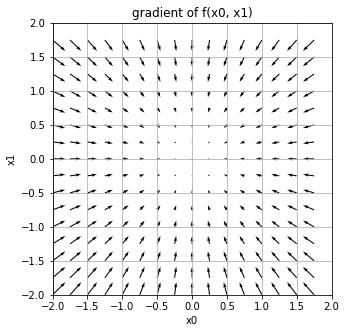

In [28]:
plt.figure(figsize=(5,5))
plt.quiver(X, Y, -grad[:,0], -grad[:,1],  angles="xy")
#,color="#555555", headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.title('gradient of f(x0, x1)')
plt.show()